### Project Name: US Accidents Dataset
### Team member: Gauri Kulkarni(823697401) , Shweta Nazarkar()

In [20]:
# IMPORT PACKAGES AND MODULES

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Read US Accidents dataset

In [2]:
us_accidents_path = r'/Users/gaurikulkarni/Downloads/'
us_accidents_filename = 'US_Accidents_Dec19.csv'

us_accident_data = pd.read_csv(us_accidents_path+us_accidents_filename)
us_accident_data.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
list(us_accident_data)

['ID',
 'Source',
 'TMC',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Number',
 'Street',
 'Side',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

### Accident count per state 

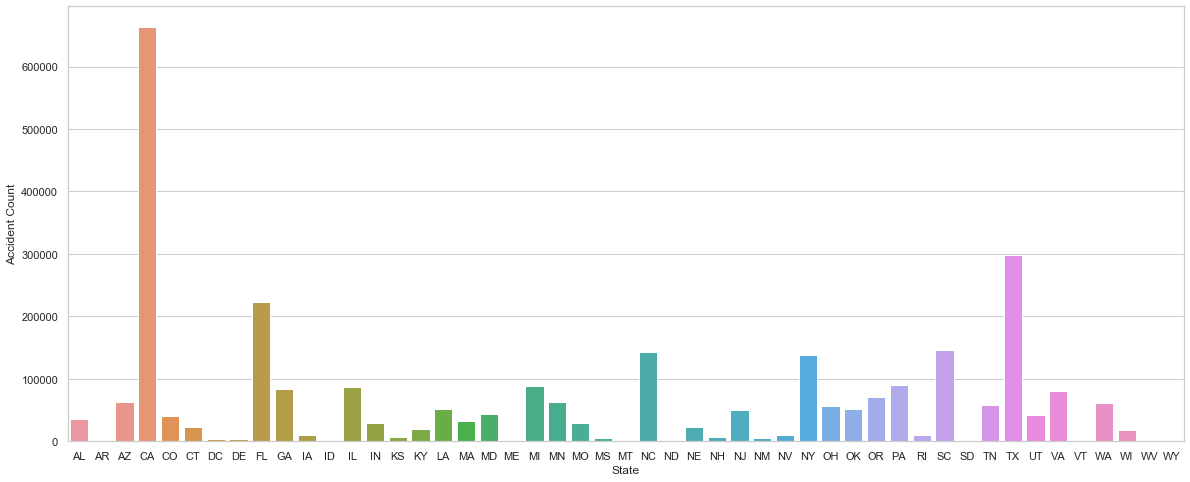

In [52]:
def stateByCount(df_data):
    df_result = df_data.groupby(['State'])['ID'].count()
    return df_result

state_by_data = stateByCount(us_accident_data)

state_by_accidnets = pd.DataFrame(state_by_data).reset_index()
state_by_accidnets.columns = ['State','Accident Count']

sns.set(style="whitegrid")
plt.figure(figsize=(20,8))
ax = sns.barplot(x="State", y="Accident Count", data=state_by_accidnets)

#### Analysis: This graph syas that California is with highest count for accidents in the US 

-------------------------------------------------------------------------------------------------------------------

### Severity of the accidetns 

,Severity Range,Count
0,2,1993410
1,3,887620
2,4,92337
3,1,968


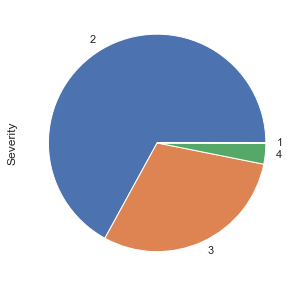

In [32]:
us_accident_data['Severity'].value_counts().plot.pie(subplots=True, figsize=(15, 5))
severity_count =  us_accident_data['Severity'].value_counts()
severity_count = pd.DataFrame(severity_count).reset_index()
severity_count.columns = ['Severity Range','Count']
severity_count

-------------------------------------------------------------------------------------------------------------------
### Finding key factor for increasing an accidents

In [55]:
us_accdient_factors = us_accident_data[['ID','Severity','State','Temperature(F)','Visibility(mi)','Weather_Condition']]
us_accdient_factors

,ID,Severity,State,Temperature(F),Visibility(mi),Weather_Condition
0,A-1,3,OH,36.9,10.0,Light Rain
1,A-2,2,OH,37.9,10.0,Light Rain
2,A-3,2,OH,36.0,10.0,Overcast
3,A-4,3,OH,35.1,9.0,Mostly Cloudy
4,A-5,2,OH,36.0,6.0,Mostly Cloudy
...,...,...,...,...,...,...
2974330,A-2974354,2,CA,86.0,10.0,Fair
2974331,A-2974355,2,CA,70.0,10.0,Fair
2974332,A-2974356,2,CA,73.0,10.0,Partly Cloudy
2974333,A-2974357,2,CA,71.0,10.0,Fair


### a. Weather Condition with severity

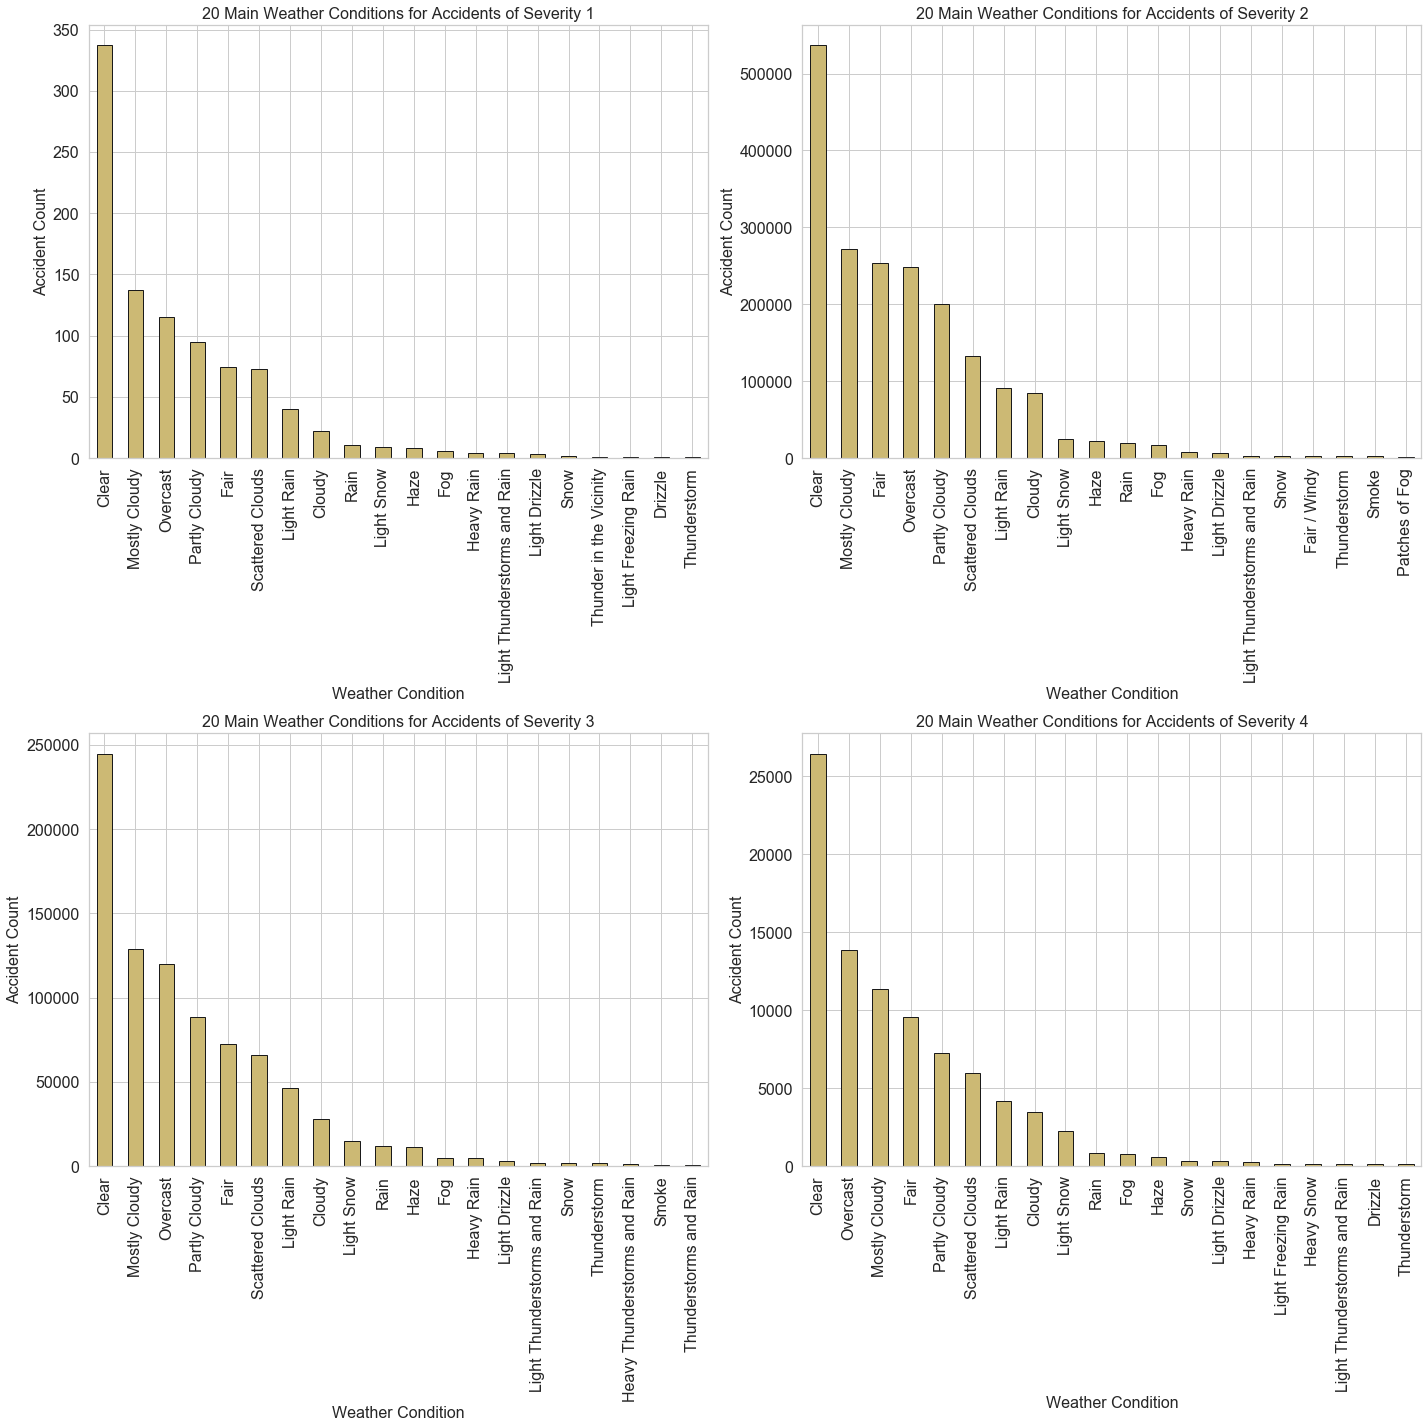

In [67]:
plt.subplots(2,2,figsize=(20,20))
for s in np.arange(1,5):
    plt.subplot(2,2,s)
    us_accdient_factors.loc[us_accdient_factors["Severity"] == s]['Weather_Condition'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('20 Main Weather Conditions for Accidents of Severity ' + str(s),fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

### Analysis:

---------------------------------------------------------------------------------------------------------------

### b. Visbility Impact 

/Users/gaurikulkarni/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/gaurikulkarni/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


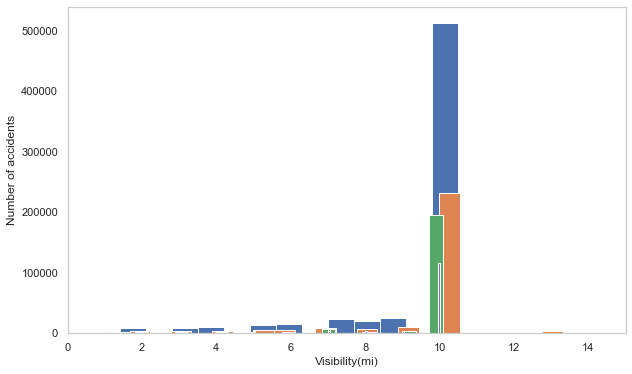

In [70]:
bins = 200
plt.figure(figsize=(10,6))
state_data = state_by_accidnets.nlargest(5, 'Accident Count') # considering 5 state with heighest count

for state in state_data['State']:
    stfilter = (us_accdient_factors['State'] == state)
    plt.hist(us_accdient_factors.loc[stfilter,'Visibility(mi)'],bins,density=False)
plt.xlabel('Visibility(mi)')
plt.ylabel('Number of accidents')
plt.xlim(0,15)
plt.grid()
plt.show()